<a href="https://colab.research.google.com/github/DanielVinicius2/Ciencia-de-Dados/blob/main/Tratamento_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Imports utilizados no Código
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Configurando a conexão com o Google Drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Bases de dados/atividade3_dataset.csv'


In [12]:
#Criação de um DataFrame baseado em um arquivo .csv
df_csv = pd.read_csv(path)
df_csv

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023
...,...,...,...,...,...,...,...,...
505,395,Bruno,46.0,CURITIBA,Headset,3321.2,2,24-08-2023
506,378,Mariana,62.0,MANAUS,Tablet,3282.26,3,19-05-2025
507,125,João,24.0,MANAUS,Headset,4529.67,5,19-02-2025
508,69,João,25.0,BELO HORIZONTE,Headset,31440.9,8,01-02-2024


In [13]:
#Print dos 5 primeiros valores(Linhas) do DataFrame
df_csv.head()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023


In [14]:
df_csv_types = df_csv.dtypes
df_csv_types

,0
ID,int64
Nome,object
Idade,float64
Cidade,object
Produto,object
Preço,object
Quantidade,int64
Data_Compra,object


In [15]:
#Codigo para converter os tipos errados do DataFrame
#Mudanças: idade = float64 -> idade = int64
#Data_Compra = object -> datetime64

df_convertido = df_csv.copy()

# Preço: substituir vírgula por ponto e converter para float
df_convertido['Preço'] = df_convertido['Preço'].astype(str).str.replace(',', '.')
df_convertido['Preço'] = pd.to_numeric(df_convertido['Preço'], errors='coerce')

# Idade: garantir numérico inteiro
df_convertido['Idade'] = pd.to_numeric(df_convertido['Idade'], errors='coerce').astype('Int64')

# Quantidade: garantir inteiro
df_convertido['Quantidade'] = pd.to_numeric(df_convertido['Quantidade'], errors='coerce').astype('Int64')

# Data_Compra: converter para datetime
df_convertido['Data_Compra'] = pd.to_datetime(df_convertido['Data_Compra'], format='%d-%m-%Y', errors='coerce')

# Tipos após conversão
df_csv_types_ajustado = df_convertido.dtypes

df_csv_types, df_csv_types_ajustado, df_convertido.head()

(ID               int64
 Nome            object
 Idade          float64
 Cidade          object
 Produto         object
 Preço           object
 Quantidade       int64
 Data_Compra     object
 dtype: object,
 ID                      int64
 Nome                   object
 Idade                   Int64
 Cidade                 object
 Produto                object
 Preço                 float64
 Quantidade              Int64
 Data_Compra    datetime64[ns]
 dtype: object,
    ID     Nome  Idade          Cidade   Produto     Preço  Quantidade  \
 0   1  Mariana     48       FORTALEZA    Tablet   2010.87           7   
 1   2    Bruno     42  RIO DE JANEIRO   Teclado       NaN           6   
 2   3      Ana     54  RIO DE JANEIRO   Monitor   3619.29           2   
 3   4   Carlos     62        CURITIBA   Teclado  40415.90           8   
 4   5  Mariana     60        CURITIBA  Notebook    716.66           8   
 
   Data_Compra  
 0  2024-05-30  
 1  2025-04-12  
 2  2022-12-10  
 3  2022-12-31

In [16]:
#Identifica a Quantidade de valores 'Nulls' em cada coluna
print(df_convertido.isnull().sum())

ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          38
Quantidade      0
Data_Compra     0
dtype: int64


In [17]:
#Exibe a Quantidade de dados duplicados
df_num_of_duplicatas = df_convertido.duplicated().sum()
print(df_num_of_duplicatas)

9


In [18]:
#Remove linhas que possuem Preço com valores 'Nulls'
#Motivo: Pelo fato de não possuir o preço da compra,
#Pode-se deduzir que a compra não foi realizada, logo,
#As informações relacionadas a essa pessoa,
#São irrelevantes para a analise dos dados.

df_no_preco_null = df_convertido.dropna(subset=['Preço'])
df_no_preco_null

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48,FORTALEZA,Tablet,2010.87,7,2024-05-30
2,3,Ana,54,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62,CURITIBA,Teclado,40415.90,8,2022-12-31
4,5,Mariana,60,CURITIBA,Notebook,716.66,8,2023-09-14
5,6,Mariana,18,SALVADOR,Headset,2388.44,8,2024-02-23
...,...,...,...,...,...,...,...,...
505,395,Bruno,46,CURITIBA,Headset,3321.20,2,2023-08-24
506,378,Mariana,62,MANAUS,Tablet,3282.26,3,2025-05-19
507,125,João,24,MANAUS,Headset,4529.67,5,2025-02-19
508,69,João,25,BELO HORIZONTE,Headset,31440.90,8,2024-02-01


In [19]:
#Exibe o DataFrame após remoção dos dados duplicados
df_no_duplicatas = df_no_preco_null.drop_duplicates()
df_no_duplicatas


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48,FORTALEZA,Tablet,2010.87,7,2024-05-30
2,3,Ana,54,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62,CURITIBA,Teclado,40415.90,8,2022-12-31
4,5,Mariana,60,CURITIBA,Notebook,716.66,8,2023-09-14
5,6,Mariana,18,SALVADOR,Headset,2388.44,8,2024-02-23
...,...,...,...,...,...,...,...,...
496,497,Lucas,54,RIO DE JANEIRO,Mouse,2815.44,8,2024-01-30
497,498,Fernanda,41,SÃO PAULO,Teclado,1176.08,9,2024-02-17
498,499,Lucas,22,PORTO ALEGRE,Teclado,3209.09,5,2025-01-21
499,500,Pedro,46,RIO DE JANEIRO,Teclado,3474.99,9,2024-08-09


In [20]:
#Resolvi não mexer nos valores nulos das idades
#Motivo: Pela minha analise o mais importante desses dados seriam as colunas:
#'Cidade', 'Produto', 'Preço', 'Quantidade' e 'Data_compra'
#Porém se fosse necessario mudar faria assim:
df_no_duplicatas['Idade'] = df_no_duplicatas['Idade'].fillna(0).astype(int)
df_no_duplicatas

/tmp/ipython-input-1980521985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicatas['Idade'] = df_no_duplicatas['Idade'].fillna(0).astype(int)


,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48,FORTALEZA,Tablet,2010.87,7,2024-05-30
2,3,Ana,54,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62,CURITIBA,Teclado,40415.90,8,2022-12-31
4,5,Mariana,60,CURITIBA,Notebook,716.66,8,2023-09-14
5,6,Mariana,18,SALVADOR,Headset,2388.44,8,2024-02-23
...,...,...,...,...,...,...,...,...
496,497,Lucas,54,RIO DE JANEIRO,Mouse,2815.44,8,2024-01-30
497,498,Fernanda,41,SÃO PAULO,Teclado,1176.08,9,2024-02-17
498,499,Lucas,22,PORTO ALEGRE,Teclado,3209.09,5,2025-01-21
499,500,Pedro,46,RIO DE JANEIRO,Teclado,3474.99,9,2024-08-09


In [21]:
#Informações gerais sobre o DataFrame
print(df_no_duplicatas.info())

<class 'pandas.core.frame.DataFrame'>
Index: 463 entries, 0 to 508
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           463 non-null    int64         
 1   Nome         463 non-null    object        
 2   Idade        463 non-null    int64         
 3   Cidade       463 non-null    object        
 4   Produto      463 non-null    object        
 5   Preço        463 non-null    float64       
 6   Quantidade   463 non-null    Int64         
 7   Data_Compra  463 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 33.0+ KB
None


In [22]:
# Exibe o nome das colunas existentes
print(df_no_duplicatas.columns)

Index(['ID', 'Nome', 'Idade', 'Cidade', 'Produto', 'Preço', 'Quantidade',
       'Data_Compra'],
      dtype='object')


In [23]:
# Exibe todos os valores de uma coluna especifica
df_csv["Nome"]

,Nome
0,Mariana
1,Bruno
2,Ana
3,Carlos
4,Mariana
...,...
505,Bruno
506,Mariana
507,João
508,João


In [24]:
# Exibe todos os valores de uma combinação de colunas
df_csv[["Cidade", "Produto", "Quantidade"]]

,Cidade,Produto,Quantidade
0,FORTALEZA,Tablet,7
1,RIO DE JANEIRO,Teclado,6
2,RIO DE JANEIRO,Monitor,2
3,CURITIBA,Teclado,8
4,CURITIBA,Notebook,8
...,...,...,...
505,CURITIBA,Headset,2
506,MANAUS,Tablet,3
507,MANAUS,Headset,5
508,BELO HORIZONTE,Headset,8


In [25]:
#Estatísticas individuais de cada coluna
df_no_duplicatas["Cidade"].value_counts()

,count
Cidade,
PORTO ALEGRE,62
SALVADOR,58
BELO HORIZONTE,55
MANAUS,51
FORTALEZA,51
CURITIBA,50
RIO DE JANEIRO,50
SÃO PAULO,43
porto alegre,10


In [26]:
#O codigo abaixo foi utilizado a fim de Remover problemas de Separação de dados
#com mesmo valor, ou seja, valores finais iguais porém escritos de maneiras diferentes.
#(Ex: São paulo x SÃO PAULO)

df_no_duplicatas['Cidade'] = df_no_duplicatas['Cidade'].str.upper()  # Padroniza para maiúsculas
df_contagem_no_duplicatas_cidades = df_no_duplicatas['Cidade'].value_counts()
df_contagem_no_duplicatas_cidades


/tmp/ipython-input-4132011201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicatas['Cidade'] = df_no_duplicatas['Cidade'].str.upper()  # Padroniza para maiúsculas


,count
Cidade,
PORTO ALEGRE,72
SALVADOR,63
BELO HORIZONTE,61
FORTALEZA,56
RIO DE JANEIRO,56
CURITIBA,55
MANAUS,54
SÃO PAULO,46


In [27]:
df_base_limpa = df_no_duplicatas
df_base_limpa

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48,FORTALEZA,Tablet,2010.87,7,2024-05-30
2,3,Ana,54,RIO DE JANEIRO,Monitor,3619.29,2,2022-12-10
3,4,Carlos,62,CURITIBA,Teclado,40415.90,8,2022-12-31
4,5,Mariana,60,CURITIBA,Notebook,716.66,8,2023-09-14
5,6,Mariana,18,SALVADOR,Headset,2388.44,8,2024-02-23
...,...,...,...,...,...,...,...,...
496,497,Lucas,54,RIO DE JANEIRO,Mouse,2815.44,8,2024-01-30
497,498,Fernanda,41,SÃO PAULO,Teclado,1176.08,9,2024-02-17
498,499,Lucas,22,PORTO ALEGRE,Teclado,3209.09,5,2025-01-21
499,500,Pedro,46,RIO DE JANEIRO,Teclado,3474.99,9,2024-08-09


In [29]:
df_base_limpa.to_csv("df_base_limpa.csv", index=False, encoding="utf-8")



None


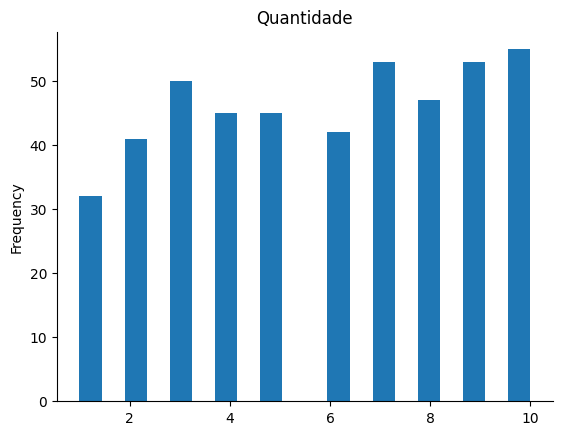

In [ ]:
df_no_duplicatas['Quantidade'].plot(kind='hist', bins=20, title='Quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

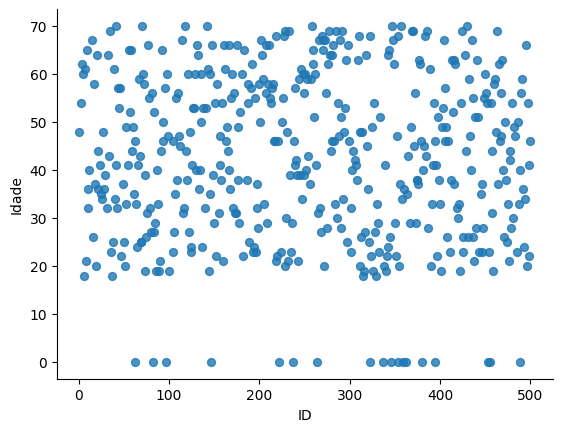

In [ ]:
#Relação entre a quantidade de idades no DataFrame
df_no_duplicatas.plot(kind='scatter', x='ID', y='Idade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

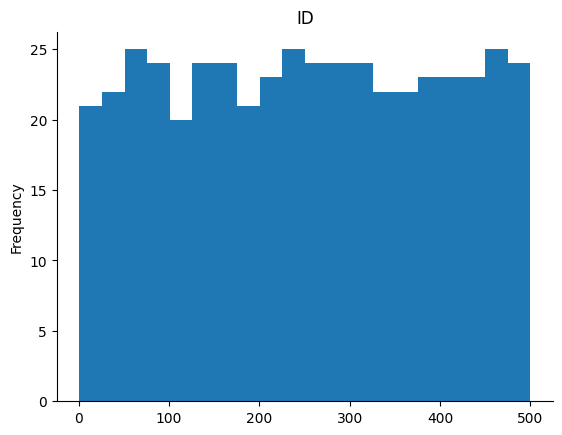

In [ ]:
df_no_duplicatas['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Estatísticas descritivas
print(df_no_duplicatas.describe(include='all')) #include=’all’

                ID      Nome       Idade        Cidade     Produto  \
count   463.000000       463  463.000000           463         463   
unique         NaN        10         NaN            16           7   
top            NaN  Fernanda         NaN  PORTO ALEGRE  Smartphone   
freq           NaN        65         NaN            62          74   
mean    252.926566       NaN   42.511879           NaN         NaN   
min       1.000000       NaN    0.000000           NaN         NaN   
25%     129.500000       NaN   29.000000           NaN         NaN   
50%     253.000000       NaN   43.000000           NaN         NaN   
75%     377.500000       NaN   57.000000           NaN         NaN   
max     500.000000       NaN   70.000000           NaN         NaN   
std     144.122975       NaN   17.405383           NaN         NaN   

               Preço  Quantidade                    Data_Compra  
count     463.000000       463.0                            463  
unique           NaN       

<Axes: xlabel='Idade', ylabel='Count'>

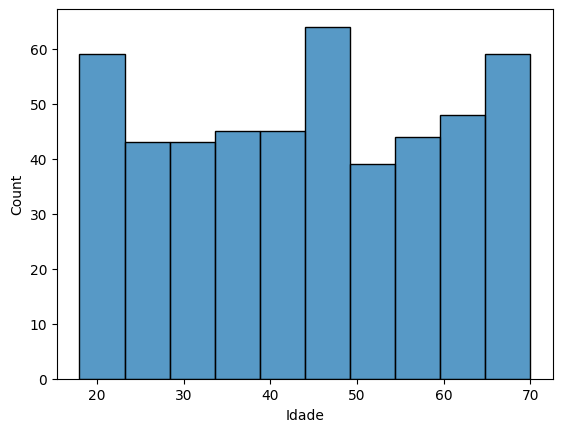

In [ ]:
sns.histplot(df_csv["Idade"])